In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
da1 = pd.read_csv('/Users/divyeshbhatt/Downloads/Datas/Time-Ser/Robberies.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

/var/folders/3t/yx5bcxjj4jl9f9w9_r2mwt4c0000gn/T/ipykernel_4390/1477024694.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  da1 = pd.read_csv('/Users/divyeshbhatt/Downloads/Datas/Time-Ser/Robberies.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)


In [3]:
split_point = len(da1) - 12

In [4]:
data, validation = da1[0:split_point], da1[split_point:]

In [5]:
print(len(data), len(validation))

106 12


In [6]:
data.to_csv('data.csv', header = 0)

In [7]:
validation.to_csv('validation.csv', header = 0)

In [8]:
da2 = pd.read_csv('data.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

/var/folders/3t/yx5bcxjj4jl9f9w9_r2mwt4c0000gn/T/ipykernel_4390/2521288417.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  da2 = pd.read_csv('data.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)


In [9]:
da2.head()

1966-01-01
1966-02-01    39
1966-03-01    50
1966-04-01    40
1966-05-01    43
1966-06-01    38
Name: 41, dtype: int64

In [10]:
X = da2.values
X = X.astype('float32')
training_s = int(len(X) * 0.50)

In [11]:
train, test = X[0:training_s], X[training_s:]

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
hist1 = [x for x in train]

In [14]:
pred1 = list()

In [15]:
for i in range(len(test)):
    yhat = hist1[-1]
    pred1.append(yhat)
    
    obs = test[i]
    hist1.append(obs)

print(yhat, obs)

rms = sqrt(mean_squared_error(test, pred1))
print(rms)

364.0 487.0
51.84355927858228


In [16]:
da2.describe()

count    105.000000
mean     174.361905
std      112.015806
min       29.000000
25%       77.000000
50%      149.000000
75%      273.000000
max      487.000000
Name: 41, dtype: float64

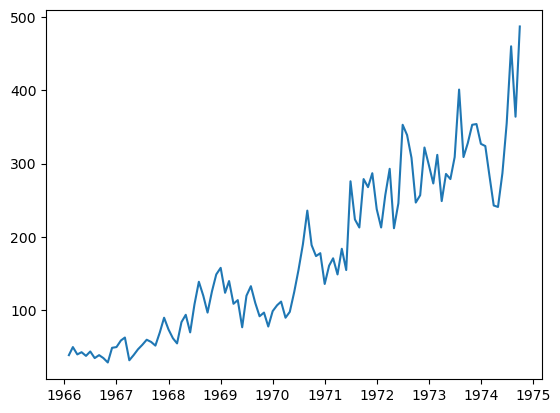

In [17]:
plt.plot(da2)
plt.show()

In [18]:
##density

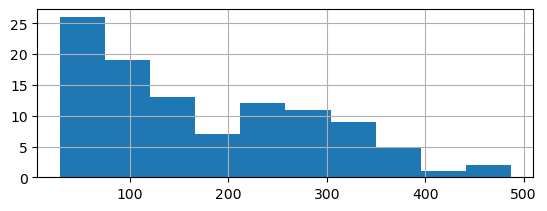

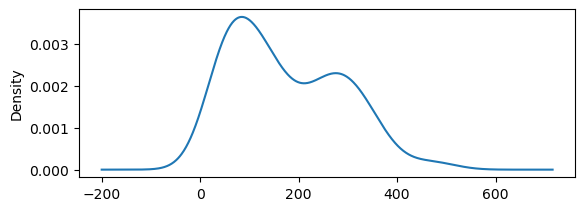

In [19]:
plt.figure()
plt.subplot(211)
da2.hist()
plt.figure()
plt.subplot(212)
da2.plot(kind = 'kde')
plt.show()

In [20]:
##box plot

In [21]:
from pandas import Grouper

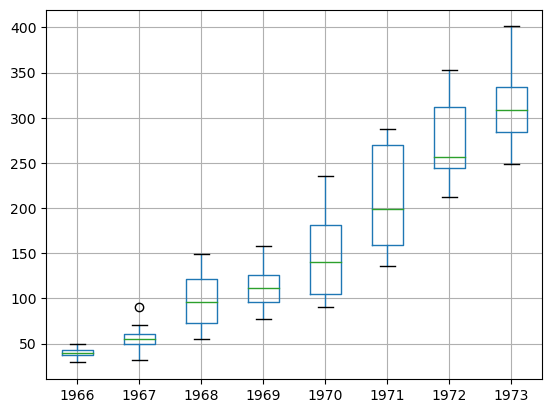

In [22]:
group1 = da1['1966':'1973'].groupby(Grouper(freq = 'A'))
years = pd.DataFrame()

for name, group in group1:
    years[name.year] = group.values
    
years.boxplot()
plt.show()

In [23]:
#ARIMA

In [24]:
from pandas import Series

In [25]:
def differ1(dataset):
    diff1 = list()
    for i in range(1, len(dataset)):
        val1 = dataset[i] - dataset[i-1]
        diff1.append(val1)
    return Series(diff1)

In [26]:
X = da2.values

In [27]:
station1 = differ1(X)
station1.index = da2.index[1:]

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
res_new = adfuller(station1)

In [30]:
print('ADF Stat: ', res_new[0])
print('p-val: ', res_new[1])
print('Critical V: ')
for key, value in res_new[4].items():
    print(key, value)

    station1.to_csv('Stationary.csv', header = False)

ADF Stat:  -3.9542228889836823
p-val:  0.001670123204826405
Critical V: 
1% -3.503514579651927
5% -2.893507960466837
10% -2.583823615311909


In [31]:
#ACF, PACF

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

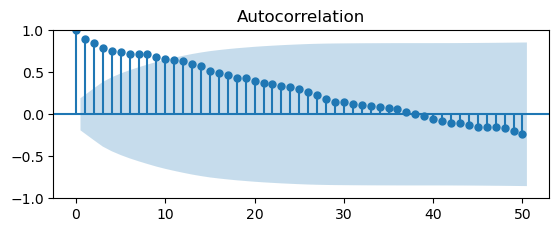

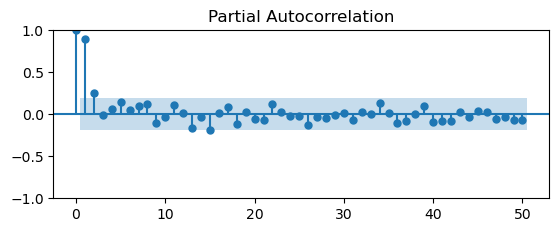

In [33]:
plt.figure()
plt.subplot(211)
plot_acf(da2, lags = 50, ax = plt.gca())
plt.figure()
plt.subplot(212)
plot_pacf(da2, lags = 50, ax = plt.gca())
plt.show()

In [34]:
## Simpler Ver For Checking Station

In [35]:
station1 = da2.diff().dropna()

In [36]:
res2 = adfuller(station1)

In [37]:
print('ADF Stat: ', res2[0])
print('p-val: ', res2[1])
print('Crit V: ')
for key, value in res2[4].items():
    print(key, value)

ADF Stat:  -3.9542228889836823
p-val:  0.001670123204826405
Crit V: 
1% -3.503514579651927
5% -2.893507960466837
10% -2.583823615311909


In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
da2 = pd.read_csv('data.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
X = da2.values
X = X.astype('float32')
train_s = int(len(X) * 0.50)

train, test = X[0:train_s], X[train_s:]

hist1 = [x for x in train]
pred1 = list()

for i in range(len(test)):
    mod1 = ARIMA(hist1, order = (0, 1, 2))
    mo_fit = mod1.fit()
    yhat = mo_fit.forecast()[0]
    pred1.append(yhat)
    
    obs = test[i]
    hist1.append(obs)
    
    print(yhat, obs)
    
rms = sqrt(mean_squared_error(test, pred1))
print(rms)

99.93296474667801 125.0
116.4607671431225 155.0
139.98653366638575 190.0
176.95770472745403 236.0
232.8894011315611 189.0
184.62395272497452 174.0
180.71827901140455 178.0
179.86698928210495 136.0
141.0596809265142 161.0
166.22332223872417 171.0
166.99319778557333 149.0
150.64393104726054 184.0
182.35881116569894 155.0
154.17047815709864 276.0
245.23011740746284 224.0
225.92356138357763 213.0
216.86889690320015 279.0
258.6974558840961 268.0
263.3829151389966 287.0
279.9471676849382 238.0
251.4888207284881 213.0
226.57033507859282 257.0


/var/folders/3t/yx5bcxjj4jl9f9w9_r2mwt4c0000gn/T/ipykernel_4390/4092178965.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  da2 = pd.read_csv('data.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)


249.6904959285761 293.0
277.2159960321216 212.0
230.01282773252908 246.0
245.7853978062039 353.0
318.02267790275187 339.0
313.7184301148771 308.0
305.548913097457 247.0
263.38987627485443 257.0
272.4371374666356 322.0
310.2448473991685 298.0
288.6277714229411 273.0
280.36984862827615 312.0
307.4842244113534 249.0
258.41016895241535 286.0
290.45306807104885 279.0
277.1688727172388 309.0
300.3946131521135 401.0
364.3301667713786 309.0
303.50990459877016 328.0
329.7253043222182 353.0
340.44794854347396 354.0
344.7145662453576 327.0
330.5016254497517 324.0
329.8810434531001 285.0
302.30840371588334 243.0
272.0165531959174 241.0
262.93451760382266 287.0
286.90930723267684 355.0
329.3850276880579 460.0
409.0426619037477 364.0
335.24787996389074 487.0
51.11918622322495


In [40]:
## Grid Search

In [41]:
p_vals = range(0, 4)
d_vals = range(0, 3)
q_vals = range(0, 4)

best_score, best_cfg = float('inf'), None
for p in p_vals:
    for d in d_vals:
        for q in q_vals:
            order = (p, d, q)
            try:
                mod1 = ARIMA(train, order = order)
                mo_fit2 = mod1.fit()
                
                predict1 = mo_fit2.forecast(steps = len(test))
                rms2 = sqrt(mean_squared_error(test, predict1))
                
                if rms2 < best_score:
                    best_score, best_cfg = rms2, order
                    print(order, rms2)
            except:
                continue
                
print(best_score, best_cfg)

(0, 0, 0) 202.8380693204395
(0, 1, 0) 186.14677714510515
(0, 1, 2) 185.13017006381955
(0, 1, 3) 185.0886370072138
(0, 2, 0) 89.86730259372258


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/

89.86730259372258 (0, 2, 0)


In [42]:
## Plot Resids

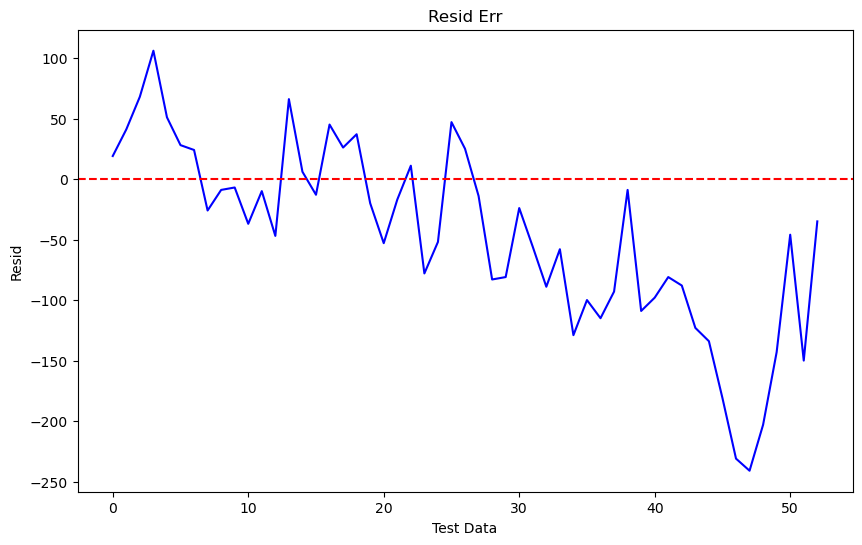

89.86730259372258


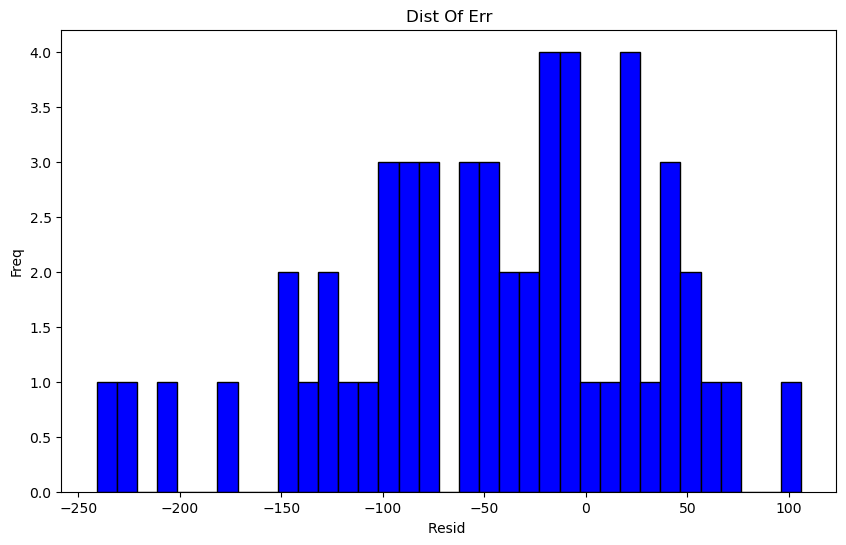

In [43]:
mod2 = ARIMA(train, order = best_cfg)
mo_fit2 = mod2.fit()

pred2 = mo_fit2.forecast(steps = len(test))

resid = test - pred2

plt.figure(figsize = (10, 6))
plt.plot(resid, color = 'b')
plt.axhline(y = 0, linestyle = '--', color = 'r')
plt.title('Resid Err')
plt.xlabel('Test Data')
plt.ylabel('Resid')
plt.show()

rms2 = sqrt(mean_squared_error(test, pred2))
print(rms2)

plt.figure(figsize = (10, 6))
plt.hist(resid, bins = 35, color = 'blue', edgecolor = 'black')
plt.title('Dist Of Err')
plt.xlabel('Resid ')
plt.ylabel('Freq')
plt.show()

In [44]:
##acf

In [45]:
##cont.from above

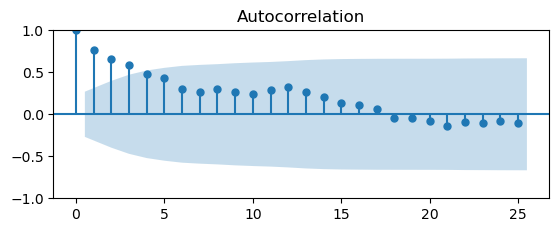

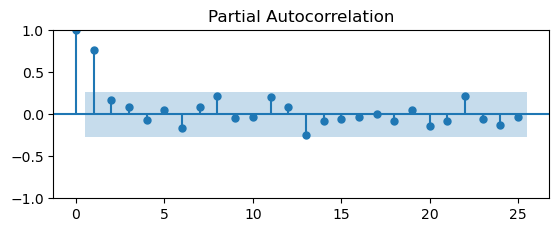

In [46]:
plt.figure()
plt.subplot(211)
plot_acf(resid, lags = 25, ax = plt.gca())
plt.figure()
plt.subplot(212)
plot_pacf(resid, lags = 25, ax = plt.gca())
plt.show()

In [47]:
##Box 

In [48]:
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot

In [49]:
transformed1, lam = boxcox(X)

/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


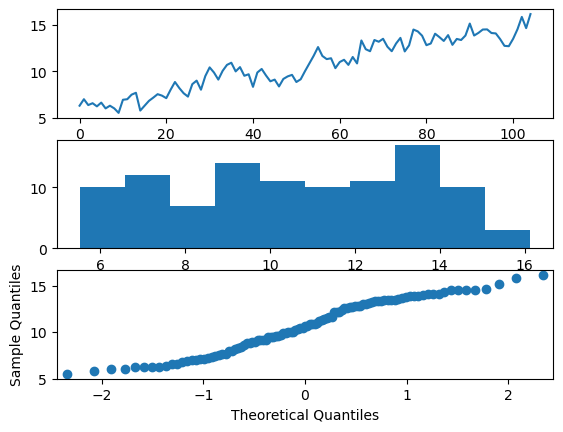

In [50]:
plt.figure(1)
plt.subplot(311)
plt.plot(transformed1)

plt.subplot(312)
plt.hist(transformed1)

plt.subplot(313)
qqplot(transformed1, color = 'r', ax = plt.gca())

plt.show()

In [51]:
## boxcox inverse fn

In [52]:
from math import sqrt
from math import log
from math import exp

In [53]:
def boxcox_inv(val1, lam1):
    if lam1 == 0:
        return exp(val1)
    return exp(log(lam1 * val1 + 1))

In [54]:
X = da2.values
X = X.astype('float32')
train_s = int(len(X) * .50)
train, test = X[0:train_s], X[train_s:]

In [55]:
hist1 = [x for x in train]
predict1 = []

for i in range(len(test)):
    #tr
    transf1, lam1 = boxcox(hist1)
    if lam1 < -5:
        transf1, lam1 = hist1, 1
    #pred
    mod = ARIMA(transf1, order = (0, 1, 2))
    mod_f = mod.fit()
    yhat1 = mod_f.forecast()[0]
    
    yhat1 = boxcox_inv(yhat1, lam1)
    predict1.append(yhat1)
    
    #obs
    obs = test[i]
    hist1.append(obs)
print(yhat1, obs)

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


5.509664950062115 487.0


In [56]:
rms1 = sqrt(mean_squared_error(test, predict1))
print(rms1)

275.5195585862479


In [57]:

def boxcox_inv(val1, lam1):
    if lam1 == 0:
        return exp(val1)
    return exp(log(lam1 * val1 + 1)/ lam1)

X = da2.values
X = X.astype('float32')
train_s = int(len(X) * 0.50)
train, test = X[0:train_s], X[train_s:]

hist1 = [x for x in train]
predict1 = list()

for i in range(len(test)):
    #tr
    transf1, lam1 = boxcox(hist1)
    if lam1 < -5:
        transf1, lam1 = hist1, 1
    #pred
    mod = ARIMA(transf1, order = (0, 1, 2))
    mod_f = mod.fit()
    yhat1 = mod_f.forecast()[0]
    
    yhat1 = boxcox_inv(yhat1, lam1)
    predict1.append(yhat1)
    
    #obs
    obs = test[i]
    hist1.append(obs)
    print(yhat1, obs)
    
rms1 = sqrt(mean_squared_error(test, predict1))
print(rms1)

99.70689120919548 125.0
115.3749599527377 155.0
136.49922863889338 190.0
166.21326268142838 236.0
207.6020815782989 189.0
180.91109080375855 174.0
178.32721904698047 178.0
179.35346133751645 136.0
145.1978387932103 161.0
165.7614231179744 171.0
166.47677209495308 149.0
151.9640836079871 184.0
179.82492714555326 155.0
155.0408523383973 276.0
239.5355932338591 224.0
210.94522920999992 213.0
214.18242829105185 279.0
257.70500295657604 268.0
255.55157260594805 287.0
276.1201054645419 238.0
245.0914324852942 213.0
226.66094598968644 257.0
252.40310792825628 293.0
275.42529316372895 212.0
224.56963199643283 246.0
248.26834473462847 353.0
313.91623880967995 339.0
312.8659005356708 308.0


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


305.38168496458763 247.0
263.3177928431604 257.0
268.95687740126476 322.0
307.2558253482527 298.0
290.668283152886 273.0
279.612328073988 312.0
305.94949729892517 249.0
259.3213965844131 286.0
288.228466201884 279.0
277.0153756973432 309.0
300.51854145739105 401.0
362.0083046618977 309.0
307.27609874013433 328.0
330.4168120726133 353.0
342.0736577505703 354.0
346.24661599174266 327.0
330.84743373148154 324.0
329.47946464875383 285.0
299.5009606030987 243.0
266.18247039414626 241.0
257.7309113984089 287.0
283.4937557449348 355.0
326.94361944735647 460.0
404.11402349839153 364.0
346.66962544728017 487.0
50.23098057625217


In [58]:
# invert box-cox transform
def boxcox_inverse(value, lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1) / lam)

X = da2.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # transform
    transformed, lam = boxcox(history)
    if lam < -5:
        transformed, lam = history, 1
        # predict
    model = ARIMA(transformed, order=(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    yhat = boxcox_inverse(yhat, lam) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)

>Predicted=99.707, Expected=125.000
>Predicted=115.375, Expected=155.000
>Predicted=136.499, Expected=190.000
>Predicted=166.213, Expected=236.000
>Predicted=207.602, Expected=189.000
>Predicted=180.911, Expected=174.000
>Predicted=178.327, Expected=178.000
>Predicted=179.353, Expected=136.000
>Predicted=145.198, Expected=161.000
>Predicted=165.761, Expected=171.000
>Predicted=166.477, Expected=149.000
>Predicted=151.964, Expected=184.000
>Predicted=179.825, Expected=155.000
>Predicted=155.041, Expected=276.000
>Predicted=239.536, Expected=224.000
>Predicted=210.945, Expected=213.000
>Predicted=214.182, Expected=279.000
>Predicted=257.705, Expected=268.000
>Predicted=255.552, Expected=287.000
>Predicted=276.120, Expected=238.000
>Predicted=245.091, Expected=213.000
>Predicted=226.661, Expected=257.000
>Predicted=252.403, Expected=293.000
>Predicted=275.425, Expected=212.000
>Predicted=224.570, Expected=246.000
>Predicted=248.268, Expected=353.000
>Predicted=313.916, Expected=339.000
>P

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


>Predicted=263.318, Expected=257.000
>Predicted=268.957, Expected=322.000
>Predicted=307.256, Expected=298.000
>Predicted=290.668, Expected=273.000
>Predicted=279.612, Expected=312.000
>Predicted=305.949, Expected=249.000
>Predicted=259.321, Expected=286.000
>Predicted=288.228, Expected=279.000
>Predicted=277.015, Expected=309.000
>Predicted=300.519, Expected=401.000
>Predicted=362.008, Expected=309.000
>Predicted=307.276, Expected=328.000
>Predicted=330.417, Expected=353.000
>Predicted=342.074, Expected=354.000
>Predicted=346.247, Expected=327.000
>Predicted=330.847, Expected=324.000
>Predicted=329.479, Expected=285.000
>Predicted=299.501, Expected=243.000
>Predicted=266.182, Expected=241.000
>Predicted=257.731, Expected=287.000
>Predicted=283.494, Expected=355.000
>Predicted=326.944, Expected=460.000
>Predicted=404.114, Expected=364.000
>Predicted=346.670, Expected=487.000
RMSE: 50.231


In [59]:
len(test)

53

In [60]:
len(predictions)

53

In [61]:
len(predict1)

53

In [62]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Assuming da2 is your dataset
X = da2.values.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = list(train)
predictions = []

for t in range(len(test)):
    # Apply Box-Cox transformation
    transformed, lam = boxcox(history if lam > -5 else history)
    # Fit the ARIMA model
    model = ARIMA(transformed, order=(0,1,2))
    model_fit = model.fit()
    # Forecast
    yhat = model_fit.forecast()[0]
    # Inverse transform
    yhat = inv_boxcox(yhat, lam)
    predictions.append(yhat)
    history.append(test[t])
    print(f'>Predicted={yhat:.3f}, Expected={test[t]:.3f}')

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse:.3f}')

>Predicted=99.707, Expected=125.000
>Predicted=115.375, Expected=155.000
>Predicted=136.499, Expected=190.000
>Predicted=166.213, Expected=236.000
>Predicted=207.602, Expected=189.000
>Predicted=180.911, Expected=174.000
>Predicted=178.327, Expected=178.000
>Predicted=179.353, Expected=136.000
>Predicted=145.198, Expected=161.000
>Predicted=165.761, Expected=171.000
>Predicted=166.477, Expected=149.000
>Predicted=151.964, Expected=184.000
>Predicted=179.825, Expected=155.000
>Predicted=155.041, Expected=276.000
>Predicted=239.536, Expected=224.000
>Predicted=210.945, Expected=213.000
>Predicted=214.182, Expected=279.000
>Predicted=257.705, Expected=268.000
>Predicted=255.552, Expected=287.000
>Predicted=276.120, Expected=238.000
>Predicted=245.091, Expected=213.000
>Predicted=226.661, Expected=257.000
>Predicted=252.403, Expected=293.000
>Predicted=275.425, Expected=212.000
>Predicted=224.570, Expected=246.000
>Predicted=248.268, Expected=353.000
>Predicted=313.916, Expected=339.000
>P

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


>Predicted=263.318, Expected=257.000
>Predicted=268.957, Expected=322.000
>Predicted=307.256, Expected=298.000
>Predicted=290.668, Expected=273.000
>Predicted=279.612, Expected=312.000
>Predicted=305.949, Expected=249.000
>Predicted=259.321, Expected=286.000
>Predicted=288.228, Expected=279.000
>Predicted=277.015, Expected=309.000
>Predicted=300.519, Expected=401.000
>Predicted=362.008, Expected=309.000
>Predicted=307.276, Expected=328.000
>Predicted=330.417, Expected=353.000
>Predicted=342.074, Expected=354.000
>Predicted=346.247, Expected=327.000
>Predicted=330.847, Expected=324.000
>Predicted=329.479, Expected=285.000
>Predicted=299.501, Expected=243.000
>Predicted=266.182, Expected=241.000
>Predicted=257.731, Expected=287.000
>Predicted=283.494, Expected=355.000
>Predicted=326.944, Expected=460.000
>Predicted=404.114, Expected=364.000
>Predicted=346.670, Expected=487.000
RMSE: 50.231


In [64]:
mod_f.save('model.pkl')
np.save('model_lambda.npy', [lam1])

In [65]:
X = da2.values
X = X.astype('float32')

transfm1, lam1 = boxcox(X)

mod1 = ARIMA(transfm1, order = (0, 1, 2))
mo_fit1 = mod1.fit()

mo_fit1.save('model1.pkl')
np.save('model1_lambda.npy', [lam1])

/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [66]:
from statsmodels.tsa.arima.model import ARIMAResults

In [67]:
mo_fit2 = ARIMAResults.load('model1.pkl')
lam = np.load('model1_lambda.npy')
yhat = mo_fit2.forecast()[0]
yhat = boxcox_inv(yhat, lam)

print(yhat)

452.5796003786665


452.5796003786665 452.0
439.0318133995445 391.0
399.6839646508674 500.0
475.19645180420264 451.0
444.89824182684447 375.0
399.0810371769996 372.0
390.60526864606015 302.0
330.47592583209797 316.0
331.7088020622211 398.0
381.14756731190084 394.0
379.33700480583775 431.0
412.8991066927349 431.0
53.37928317686633


/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


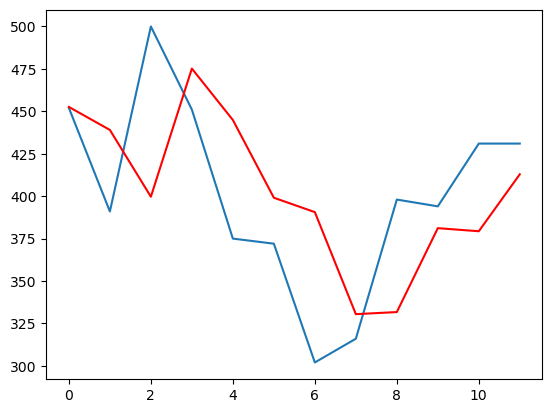

In [83]:
histx = [x for x in X]

y = validation.values.astype('float32')

mo_fit2 = ARIMAResults.load('model1.pkl')
lam1 = np.load('model1_lambda.npy')

pred1 = list()
yhat1 = mo_fit2.forecast()[0]
yhat1 = boxcox_inv(yhat1, lam1)

pred1.append(yhat1)
hist1.append(y[0])
print(yhat1, y[0])


for i in range(1, len(y)):
    transfm1, lam1 = boxcox(hist1)
    if lam1 < -5:
        transfm1, lam1 = hist1, 1
        
    mod1 = ARIMA(transfm1, order = (0, 1, 2))
    mo_fit1 = mod1.fit()
    yhat = mo_fit1.forecast()[0]

    yhat = boxcox_inv(yhat, lam1)
    pred1.append(yhat)

    obs = y[i]
    hist1.append(obs)
    
    print(yhat, obs)
    
rms = sqrt(mean_squared_error(y, pred1))
print(rms)


plt.plot(y)
plt.plot(pred1, color = 'red')
plt.show()

>Predicted=452.580, Expected=452.000
>Predicted=429.872, Expected=391.000
>Predicted=401.368, Expected=500.000
>Predicted=476.587, Expected=451.000
>Predicted=442.390, Expected=375.000
>Predicted=397.500, Expected=372.000
>Predicted=390.693, Expected=302.000
>Predicted=329.376, Expected=316.000
>Predicted=334.263, Expected=398.000
>Predicted=382.970, Expected=394.000
>Predicted=378.488, Expected=431.000
>Predicted=413.592, Expected=431.000
RMSE: 51.942


/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


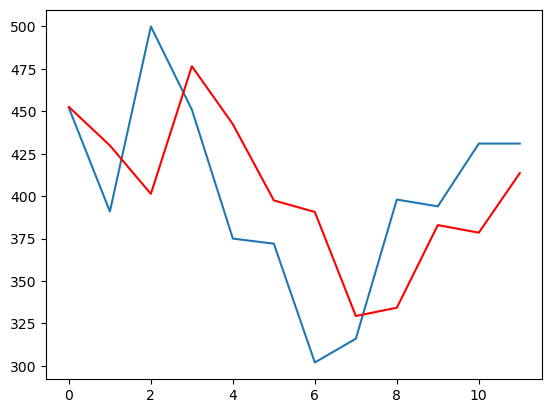

In [82]:
# invert box-cox transform
def boxcox_inverse(value, lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1) / lam)
# load and prepare datasets
history = [x for x in X]
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model1.pkl')
lam = np.load('model1_lambda.npy')
# make first prediction
predictions = list()
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam) 
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0])) 
# rolling forecasts
for i in range(1, len(y)):
    # transform
    transformed, lam = boxcox(history)
    if lam < -5:
        transformed, lam = history, 1
        # predict
    model = ARIMA(transformed, order=(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    yhat = boxcox_inverse(yhat, lam)
    predictions.append(yhat)
        
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions)) 
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red') 
plt.show()